<a href="https://colab.research.google.com/github/iLonow/sii/blob/main/%D0%96%D0%B0%D1%80%D0%B8%D0%BD%D0%BE%D0%B2_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80_%D0%A0%D0%A24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1: Линейные регрессионные модели**

Условие 1.1: Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

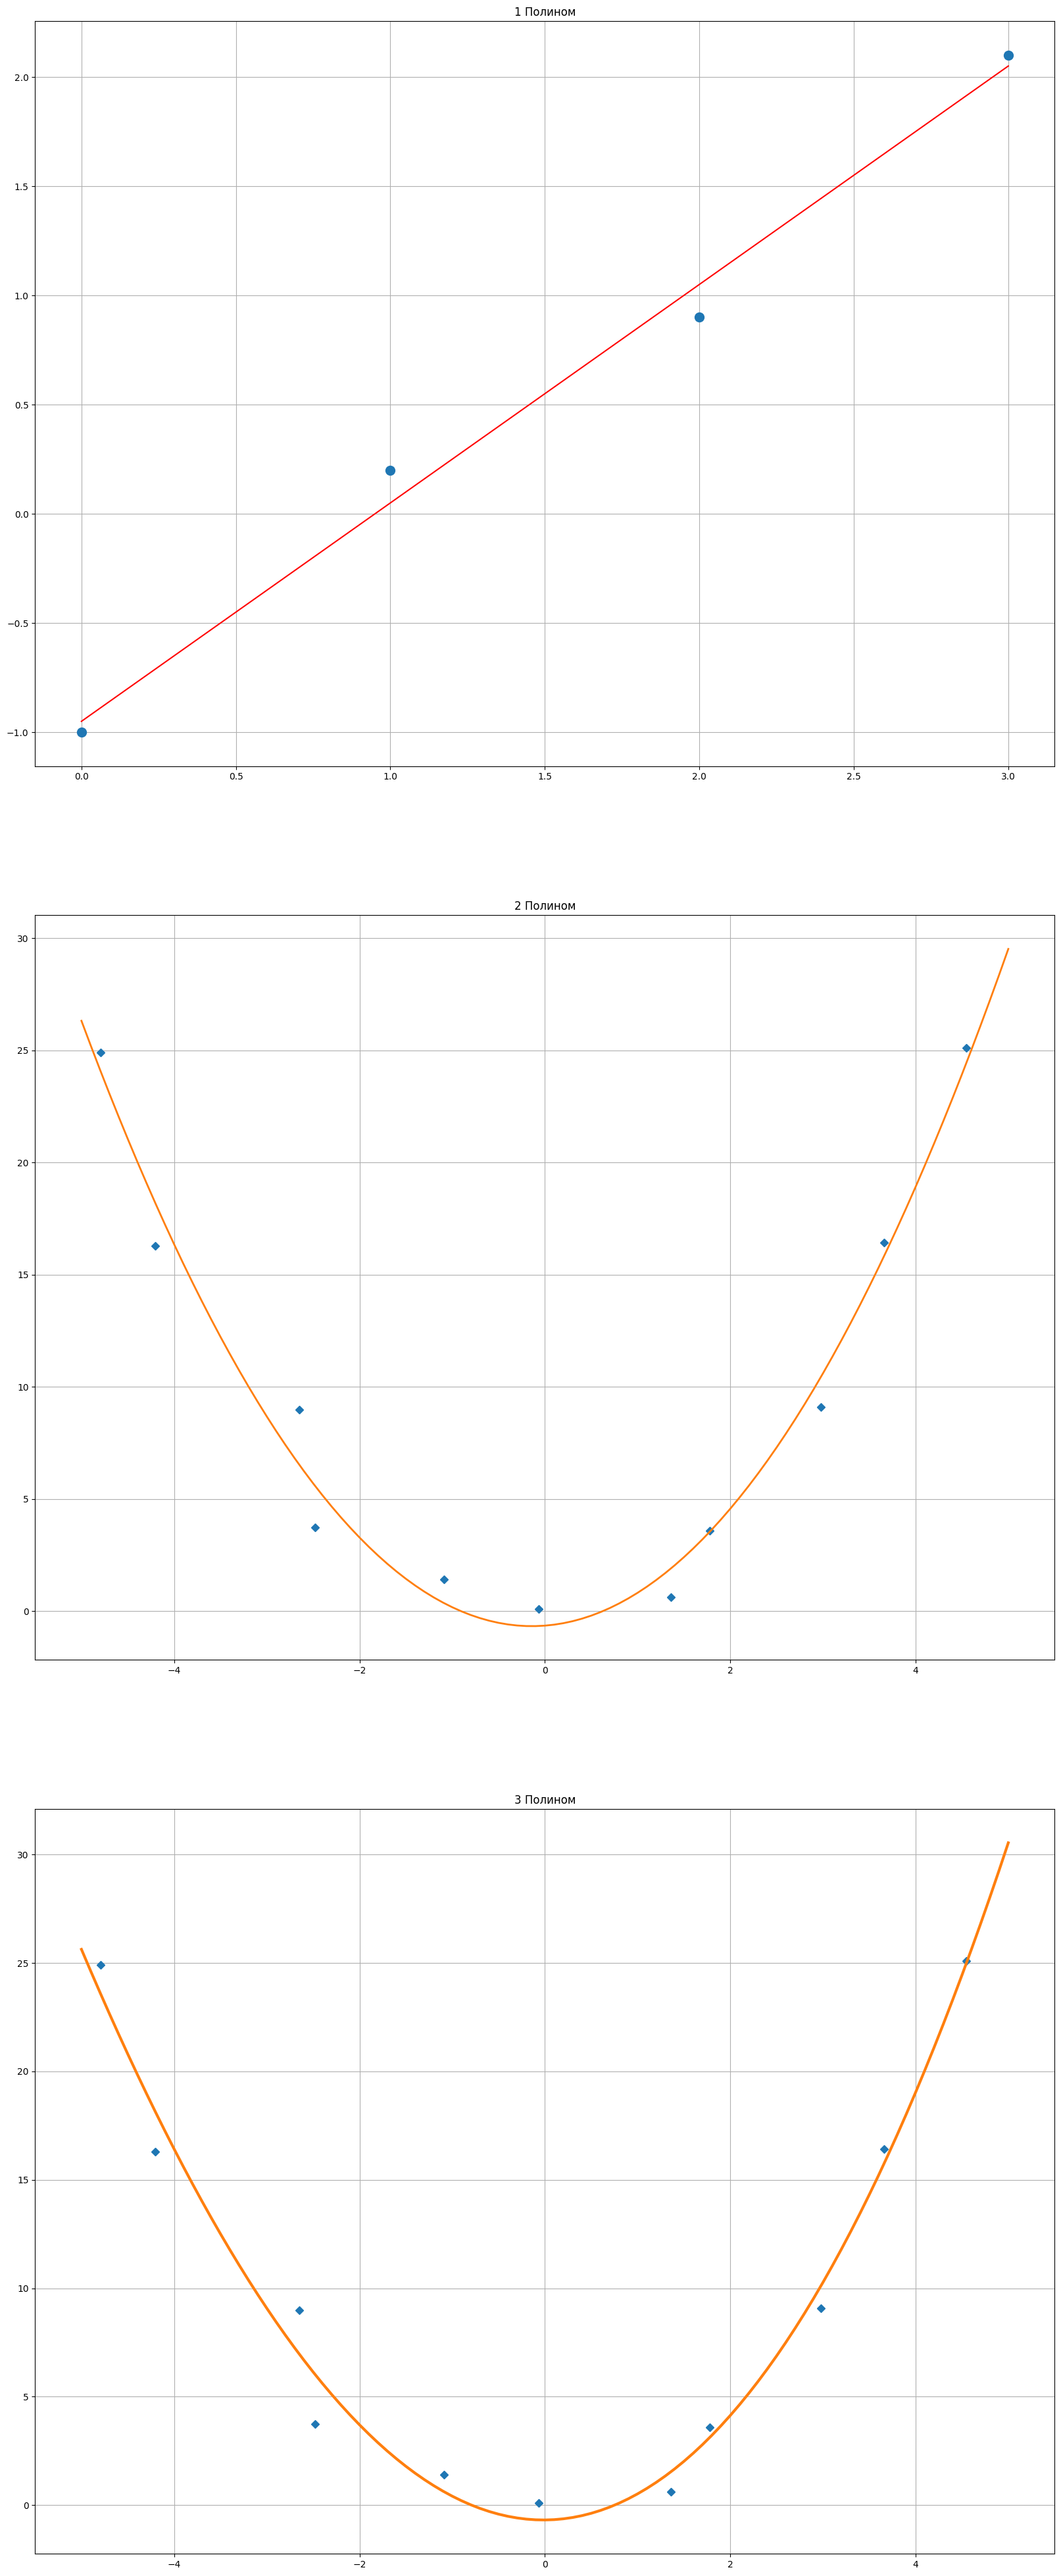

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

figure, axis = plt.subplots(3,1)
delta = 1.0
figure.set_figheight(50)
figure.set_figwidth(20)
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T
m,c = np.linalg.lstsq(A,y,rcond = None)[0]

axis[0].plot(x, y, 'o', label='Исходные данные', markersize=10)
axis[0].plot(x, m*x + c, 'r', label='Линейная экстраполяция')
axis[0].set_title("1 Полином")
axis[0].grid()


x = np.linspace(-5, 5, 11)
y = x**2 + delta * (np.random.rand(11) - 0.5)
x+= delta * (np.random.rand(11) - 0.5)
m = np.vstack((x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = np.linspace(-5, 5, 101)

axis[1].plot(x,y,'D')
axis[1].plot(x_prec, s[0]*x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
axis[1].set_title("2 Полином")
axis[1].grid()


m = np.vstack((x**3, x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
axis[2].plot(x,y,'D')
axis[2].plot(x_prec, s[0]*x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec +s[3], '-', lw=3)
axis[2].set_title("3 Полином")
axis[2].grid()

Условие 1.2: Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

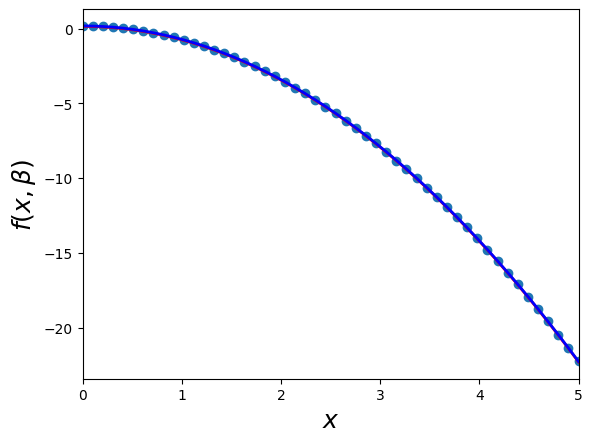

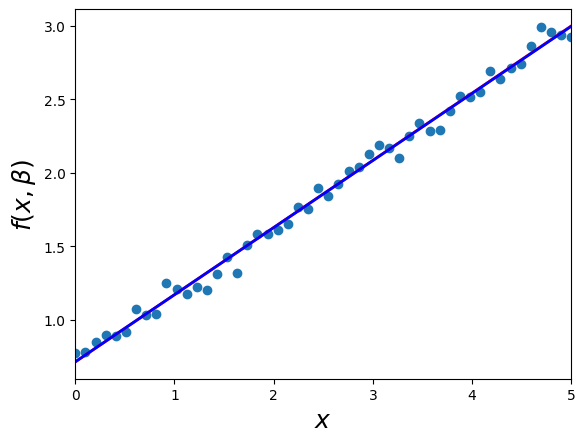

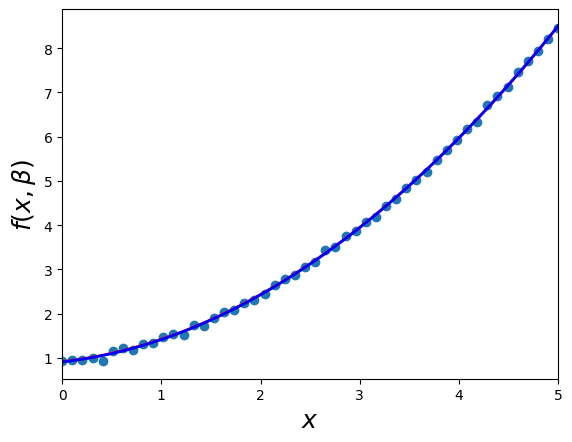

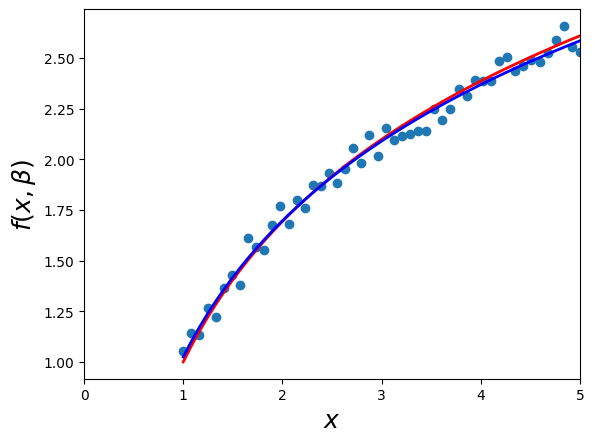

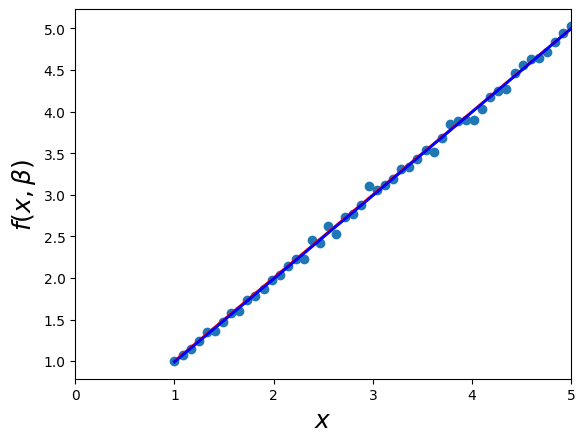

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from random import randint, random

beta = (random(), random(), random())

def f(x, b0, b1, b2):
    return b0 + b1 * (-b2) * x**2

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()


beta = (random(), random())
def f(x, b0, b1):
    return b0 + b1 * x
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
line_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()\


beta = (random(), random(), random())
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()


beta = (randint(1, 4), randint(1, 4))
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()


beta = (randint(1, 3), randint(1, 3))
def f(x, b0, b1):
    return b0 * x ** b1
xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

Условие: Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

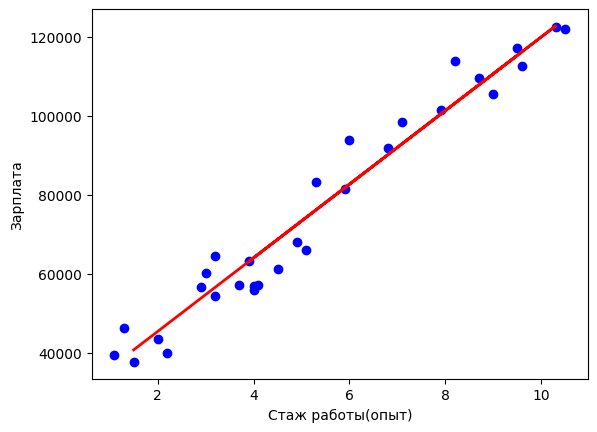

26780.09915062818
[9312.57512673]


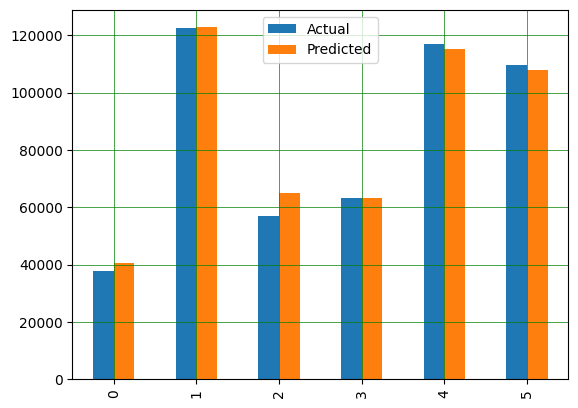

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
dataset.head()
dataset.describe()

plt.scatter (dataset['YearsExperience'], dataset['Salary'], color = 'b')
plt.xlabel("Стаж работы(опыт)")
plt.ylabel("Зарплата")


plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.show()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

Условие 3.1: Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

dataset = pd.read_csv('https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv')
dataset.head()
print(dataset.shape,'\n')
dataset.describe()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


df1 = pd.DataFrame(y)
df2 = pd.DataFrame(X)

df1 = df1.rename(columns = {0: 'PtrlConsump'}, inplace = False)
df2 = df2.rename(columns = {0: 'PtrlTax', 1: 'AvgInc', 2: 'PvdHighways', 3: 'PptnDrvrlicence(%)'}, inplace = False)
print("Petrol tax, Average income, Paved Highways, Population Driver licence(%), Petrol Consumption",'\n')
frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
print(dataset,'\n')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df,'\n')

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df,'\n')

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

(48, 5) 

Petrol tax, Average income, Paved Highways, Population Driver licence(%), Petrol Consumption 

    PtrlConsump  PtrlTax  AvgInc  PvdHighways  PptnDrvrlicence(%)
0           541     9.00  3571.0       1976.0               0.525
1           524     9.00  4092.0       1250.0               0.572
2           561     9.00  3865.0       1586.0               0.580
3           414     7.50  4870.0       2351.0               0.529
4           410     8.00  4399.0        431.0               0.544
5           457    10.00  5342.0       1333.0               0.571
6           344     8.00  5319.0      11868.0               0.451
7           467     8.00  5126.0       2138.0               0.553
8           464     8.00  4447.0       8577.0               0.529
9           498     7.00  4512.0       8507.0               0.552
10          580     8.00  4391.0       5939.0               0.530
11          471     7.50  5126.0      14186.0               0.525
12          525     7.00  4817.0     

Условие 3.2: Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

0.4285714285714277 2.571428571428573


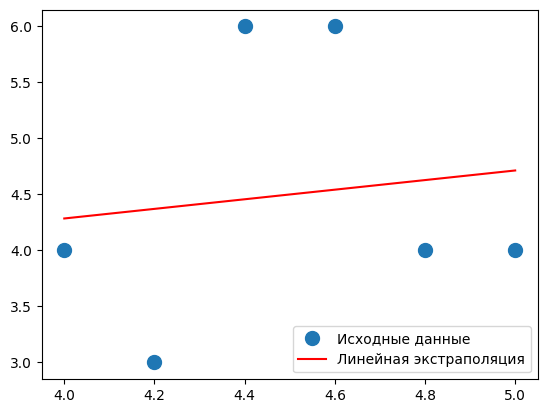

[4.  4.2 4.4 4.6 4.8 5. ]
[4. 3. 6. 6. 4. 4.]
-6.696428571428704 60.696428571429735 -132.25000000000267


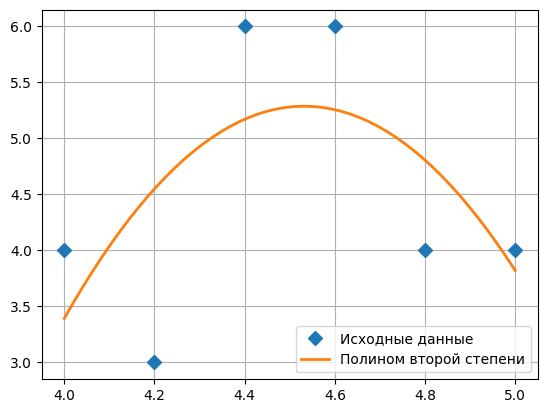

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *
x=[4.0,4.2,4.4,4.6,4.8,5.0]
y=[4.0,3.0,6.0,6.0,4.0,4.0]
new_y=np.array(y)
new_x=np.array(x)
A=np.vstack([new_x,np.ones(len(new_x))]).T
m,c= np.linalg.lstsq(A,new_y,rcond=None)[0]
print(m,c)
plt.plot(new_x,new_y,'o', label='Исходные данные', markersize=10)
plt.plot(new_x,m*new_x+c,'r',label='Линейная экстраполяция')
plt.legend()
plt.show()
print(new_x)
print(new_y)

m = np.vstack([new_x**2, new_x, np.ones(len(new_x))]).T
a, b, c = np.linalg.lstsq(m, new_y, rcond=None)[0]
m=vstack((new_x**2,new_x,ones(6))).T
s=np.linalg.lstsq(m,new_y,rcond=None)[0]
x_prec=linspace(4.0,5.0,50)
plt.plot(new_x,new_y,'D', label="Исходные данные", markersize=7)
plt.plot(x_prec,a*x_prec**2+b*x_prec+c,'-',lw=2, label="Полином второй степени")
plt.legend()
plt.grid()
print(a,b,c)
plt.savefig('solobay_a.png')